In [16]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import seaborn as sns

In [17]:
 # Read in the billboard & Spotify Song data
audio_features_df=pd.read_csv('Data/audio_features.csv')
billboard_df=pd.read_csv('Data/billboard_hot100_16-21.csv')
#print(audio_features_df)
#print(billboard_df)

# rename track on audio features to title
audio_features_df.rename(columns={'Track':'Title'}, inplace=True)

#Combine the data into a single dataset
billboard_audio_features_merged=pd.merge(audio_features_df,billboard_df, how="right", on=["Title","Artist"])
print(billboard_audio_features_merged)
#billboard_audio_features_merged.head()

       Unnamed: 0                          Artist  \
0               0                           Adele   
1               1                   Justin Bieber   
2               2                           Drake   
3               3                   Justin Bieber   
4               4                   Justin Bieber   
...           ...                             ...   
28595        3018                   Lainey Wilson   
28596        2985                    Thomas Rhett   
28597        2890     Elle King & Miranda Lambert   
28598        3059             Lil Baby & Lil Durk   
28599        3005  Nicki Minaj, Drake & Lil Wayne   

                                   Title              Spotify_ID danceability  \
0                                  Hello  62PaSfnXSMyLshYJrlTuL3        0.578   
1                                  Sorry  402qo6bnZJwCN1RUenyNuM        0.679   
2                          Hotline Bling  0wwPcA6wtMf6HUMpIRdeP7        0.891   
3                          Love Yoursel

In [18]:
billboard_audio_features_merged.drop(billboard_audio_features_merged.loc[billboard_audio_features_merged.Spotify_ID=="not found"].index, inplace=True)
billboard_audio_features_merged.head()

,Unnamed: 0,Artist,Title,Spotify_ID,danceability,energy,acousticness,instrumentalness,liveness,valence,...,mode,duration_ms,time_signature,Date,Rank,Is_New,Image,Peak_Posistion,Last_Position,Weeks
0,0,Adele,Hello,62PaSfnXSMyLshYJrlTuL3,0.578,0.43,0.33,0,0.0854,0.288,...,0,295502,4,2016-01-02,1,False,NaN,1,1,8
1,1,Justin Bieber,Sorry,402qo6bnZJwCN1RUenyNuM,0.679,0.748,0.0878,0,0.299,0.438,...,0,200787,4,2016-01-02,2,False,NaN,2,2,8
2,2,Drake,Hotline Bling,0wwPcA6wtMf6HUMpIRdeP7,0.891,0.628,0.00258,0.00019,0.0504,0.552,...,1,267067,4,2016-01-02,3,False,NaN,2,3,20
3,3,Justin Bieber,Love Yourself,3dNcOt7h5DuBgahMkOrL1m,0.759,0.401,0.86,0,0.299,0.576,...,1,232627,4,2016-01-02,4,False,NaN,4,5,5
4,4,Justin Bieber,What Do You Mean?,4Vx8DGMNlFt6q3yxVoV8qK,0.832,0.631,0.585,0.000892,0.0838,0.836,...,0,208543,4,2016-01-02,5,False,NaN,1,4,16


In [19]:
# Drop Unnamed Column
billboard_audio_features_merged.drop(['Unnamed: 0'], axis=1, inplace = True)
print(billboard_audio_features_merged)

                               Artist                              Title  \
0                               Adele                              Hello   
1                       Justin Bieber                              Sorry   
2                               Drake                      Hotline Bling   
3                       Justin Bieber                      Love Yourself   
4                       Justin Bieber                  What Do You Mean?   
...                               ...                                ...   
28595                   Lainey Wilson           Things A Man Oughta Know   
28596                    Thomas Rhett                      Country Again   
28597     Elle King & Miranda Lambert  Drunk (And I Don't Wanna Go Home)   
28598             Lil Baby & Lil Durk                     If You Want To   
28599  Nicki Minaj, Drake & Lil Wayne                       Seeing Green   

                   Spotify_ID danceability energy acousticness  \
0      62PaSfnXSMyLsh

In [20]:
# Caculate average danceability
average_danceability=pd.to_numeric(billboard_audio_features_merged["danceability"]).mean()
average_danceability

0.6801182593250443

In [21]:
# Caculate average energy
average_energy=pd.to_numeric(billboard_audio_features_merged["energy"]).mean()
average_energy

0.6317955417406749

In [22]:
# Caculate average acousticness
average_acousticness=pd.to_numeric(billboard_audio_features_merged["acousticness"]).mean()
average_acousticness

0.19547503455772647

In [23]:
# Caculate average instrumentalness
average_instrumentalness=pd.to_numeric(billboard_audio_features_merged["instrumentalness"]).mean()
average_instrumentalness

0.005508666507637656

In [24]:
# Caculate average liveness
average_liveness=pd.to_numeric(billboard_audio_features_merged["liveness"]).mean()
average_liveness

0.16515573357015986

In [25]:
# Caculate average valence
average_valence=pd.to_numeric(billboard_audio_features_merged["valence"]).mean()
average_valence

0.4825348880994671

                          average_danceability  average_energy  \
average_danceability                  1.000000        0.034984   
average_energy                        0.034984        1.000000   
average_acousticness                  0.051025       -0.003610   
average_instrumentalness              0.084388        0.158184   
average_liveness                     -0.049848        0.213230   
average_valence                       0.160233        0.035789   

                          average_acousticness  average_instrumentalness  \
average_danceability                  0.051025                  0.084388   
average_energy                       -0.003610                  0.158184   
average_acousticness                  1.000000                  0.011387   
average_instrumentalness              0.011387                  1.000000   
average_liveness                     -0.014117                  0.145519   
average_valence                       0.058176                 -0.018741   

    

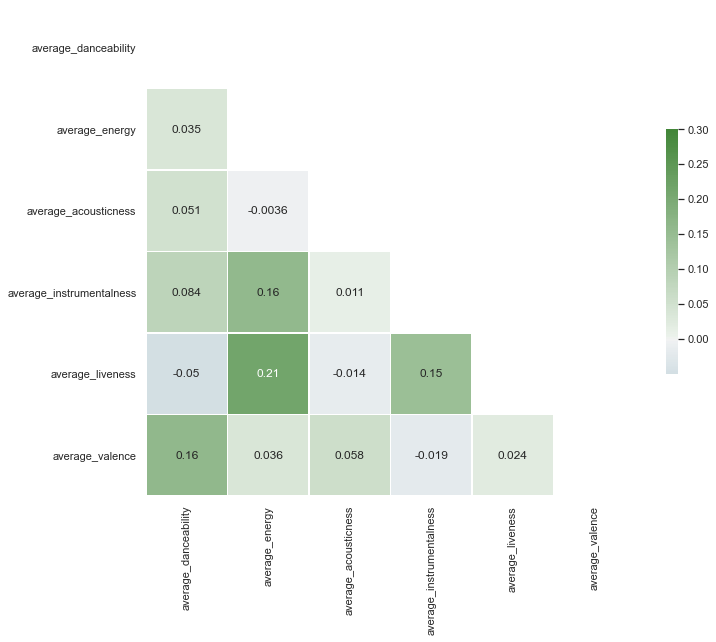

In [27]:
sns.set_theme(style="white")

# Put audio features into a list
average_audio_features=["average_danceability", "average_energy", "average_acousticness", "average_instrumentalness", "average_liveness", "average_valence"]

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 6)),
                 columns=list(average_audio_features))           

# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(225,125, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=-0,
            square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .5})

print(corr)

In [28]:
# Caculate average duration_ms
pd.to_numeric(billboard_audio_features_merged["duration_ms"]).mean()

205309.03872113678

In [29]:
# Caculate Total Songs
total_songs=billboard_audio_features_merged["Title"].count()
total_songs

28150

In [30]:
pd.to_numeric(billboard_audio_features_merged["duration_ms"]).mean()/total_songs

7.293393915493313